In [165]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, lda
from sklearn.learning_curve import learning_curve
import sklearn
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier



%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [166]:
#Load in the IRIS Dataset
iris = pd.read_csv("iris.data", header = -1)
irism = iris.as_matrix()

#Randomize the index
rindex = sklearn.utils.shuffle(range(0,len(irism)))

#randomize inditial matrix
matrix = irism[rindex,:]
irism = matrix

In [177]:
#Split test and train matrix
trainint, testint = cross_validation.train_test_split(irism, test_size=0.33, random_state=1)

xtrain = trainint[:,:4]
ytrain = trainint[:,4]
xtest = testint[:,:4]
ytest = testint[:,4]

ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

#Scale predictors for Xs on test and train
scaler = sklearn.preprocessing.StandardScaler()
scalefit = scaler.fit(xtrain)
scale_xtrain = scaler.transform(xtrain)
scale_xtest = scaler.transform(xtest)

#Create total scaled matrix for easier access
total_scale_x  = np.ma.row_stack((xtrain,xtest))
total_scale_y = np.concatenate((ytrain,ytest))

##LDA
lda = sklearn.lda.LDA(solver = "eigen")
#Fit LDA on training set
fit = lda.fit(scale_xtrain,ytrain)
#Convert entire dataset to LDA Dimensions
lda_scores = lda.transform(total_scale_x)
#ldatrain, ldatest= train_test_split(lda_scores, test_size=0.33, random_state=42)
ldatrain = lda.transform(trainint[:,0:4])
ldatest = lda.transform(testint[:,0:4])


#{PCA}
pca = PCA(n_components=4)
fit = pca.fit(scale_xtest)
pca_scores = pca.transform(total_scale_x)
#pcatrain, pcatest= train_test_split(pca_scores, test_size=0.33, random_state=42)
pcatrain = pca.transform(trainint[:,0:4])
pcatest = pca.transform(testint[:,0:4])



In [178]:
%matplotlib inline

def plotter(train_scores,test_scores,train_sizes):
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title('Training Curves')
    plt.show()

In [179]:
def KNNPlotter(estimator,Xtrain,Ytrain,Xtest,Ytest,n_neighbors,weights):
    X = Xtrain
    y = ytrain
    h = 0.02
    KNN = estimator
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap_tests = ListedColormap(['#FF0000', '#04B404', '#0000FF'])
    KNN.set_params(n_neighbors = n_neighbors)
    KNN.fit(X,y)
    # we create an instance of Neighbours Classifier and fit the data.
    train_percent = KNN.score(X, y)


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #Creates set of grid numbers for xmin and xmax(from the dataset) and uses stepH to get the numbers
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    #Sends all of those numbers into a prediction
    #Unravles matrix into an array
    Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    #Uses xx and yy as the plotting points with Z as the prediction values and applies a color mapping
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)

    #Plot test points
    y2out = KNN.score(Xtest,Ytest)
    #y2labels = le.fit_transform(Ytest)
    plt.scatter(Xtest[:,0], Xtest[:, 1], c=Ytest, cmap=cmap_tests, marker = "x")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s'\ntrain percent = %.2f test percent = %.2f)"
              % (n_neighbors, weights,train_percent,y2out))
    plt.show()

In [180]:
KNN = sklearn.neighbors.KNeighborsClassifier()
KNN.fit(scale_xtrain,ytrain)
trainlist = numpy.arange(5, 40, 1)
train_sizes, train_scores, test_scores = learning_curve(KNN, total_scale_x, total_scale_y, train_sizes = trainlist)

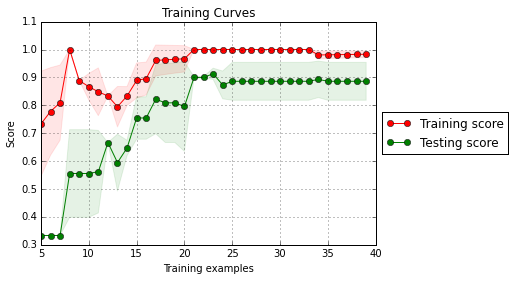

In [181]:
plotter(train_scores,test_scores,train_sizes);

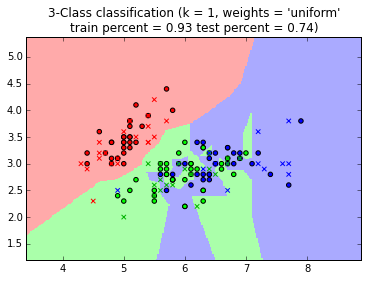

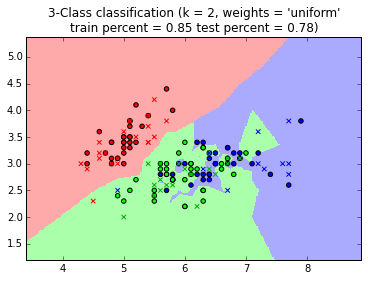

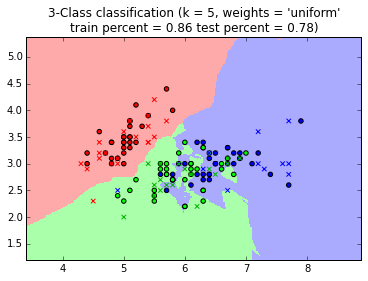

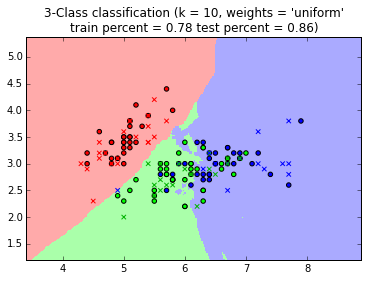

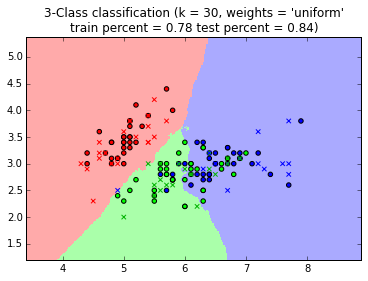

In [182]:
KNNPlotter(KNN,xtrain[:,0:2],ytrain,xtest[:,0:2],ytest,1,"uniform")
KNNPlotter(KNN,xtrain[:,0:2],ytrain,xtest[:,0:2],ytest,2,"uniform")
KNNPlotter(KNN,xtrain[:,0:2],ytrain,xtest[:,0:2],ytest,5,"uniform")
KNNPlotter(KNN,xtrain[:,0:2],ytrain,xtest[:,0:2],ytest,10,"uniform")
KNNPlotter(KNN,xtrain[:,0:2],ytrain,xtest[:,0:2],ytest,30,"uniform")



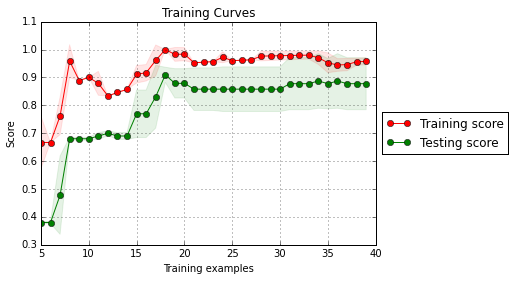

In [183]:
KNN = sklearn.neighbors.KNeighborsClassifier()
trainlist = numpy.arange(5, 40, 1)
train_sizes, train_scores, test_scores = learning_curve(KNN, pcatrain[:,0:2], ytrain, train_sizes = trainlist)
plotter(train_scores,test_scores,train_sizes)

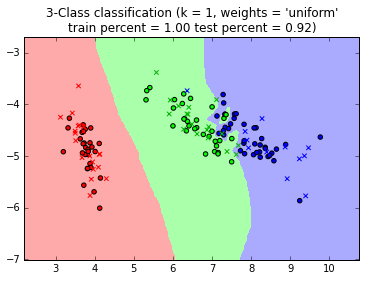

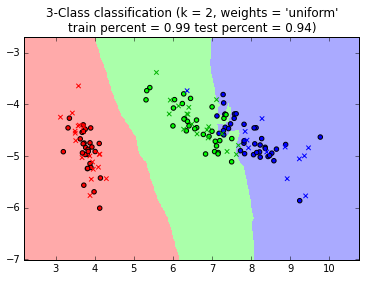

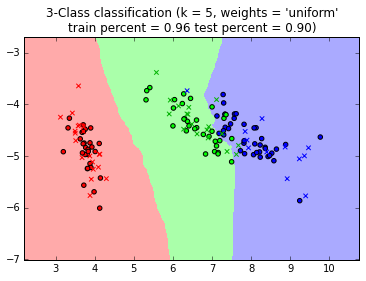

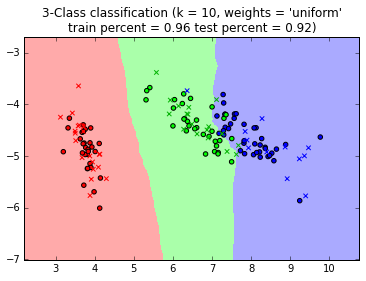

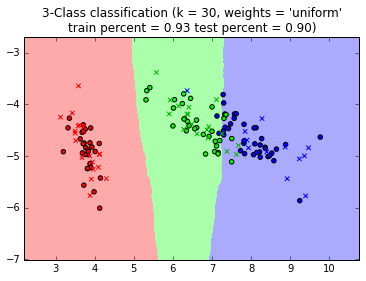

In [184]:
KNNPlotter(KNN,pcatrain[:,0:2],ytrain,pcatest[:,0:2],ytest,1,"uniform")
KNNPlotter(KNN,pcatrain[:,0:2],ytrain,pcatest[:,0:2],ytest,2,"uniform")
KNNPlotter(KNN,pcatrain[:,0:2],ytrain,pcatest[:,0:2],ytest,5,"uniform")
KNNPlotter(KNN,pcatrain[:,0:2],ytrain,pcatest[:,0:2],ytest,10,"uniform")
KNNPlotter(KNN,pcatrain[:,0:2],ytrain,pcatest[:,0:2],ytest,30,"uniform")


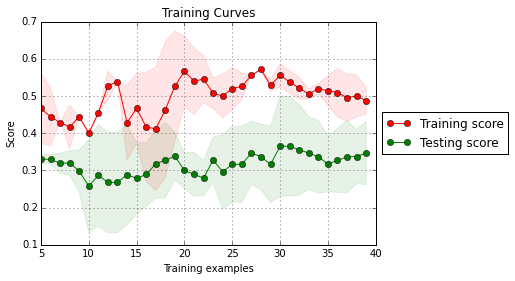

In [186]:
KNN = sklearn.neighbors.KNeighborsClassifier()
trainlist = numpy.arange(5, 40, 1)
train_sizes, train_scores, test_scores = learning_curve(KNN, ldatrain[:,0:2], y, train_sizes = trainlist)
plotter(train_scores,test_scores,train_sizes)

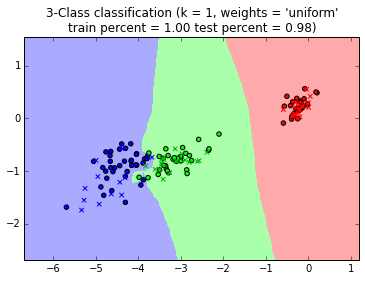

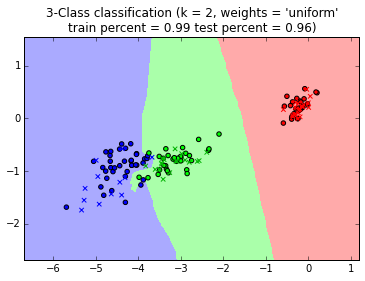

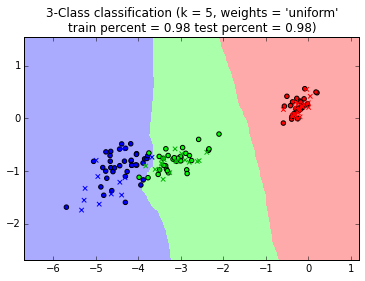

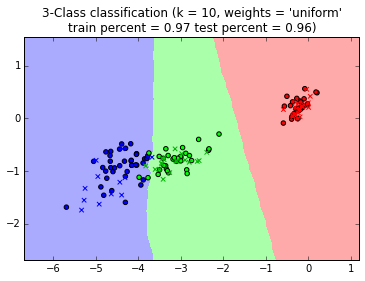

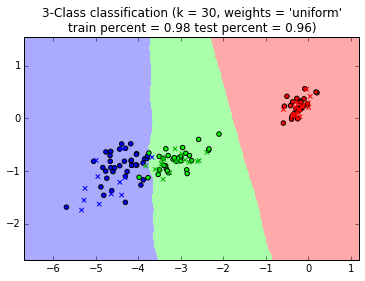

In [187]:
KNNPlotter(KNN,ldatrain[:,0:2],ytrain,ldatest[:,0:2],ytest,1,"uniform")
KNNPlotter(KNN,ldatrain[:,0:2],ytrain,ldatest[:,0:2],ytest,2,"uniform")
KNNPlotter(KNN,ldatrain[:,0:2],ytrain,ldatest[:,0:2],ytest,5,"uniform")
KNNPlotter(KNN,ldatrain[:,0:2],ytrain,ldatest[:,0:2],ytest,10,"uniform")
KNNPlotter(KNN,ldatrain[:,0:2],ytrain,ldatest[:,0:2],ytest,30,"uniform")



In [104]:
kf = cross_validation.KFold(50, n_folds=3)
KNN = sklearn.neighbors.KNeighborsClassifier()
score_list = []
for (trindex, testindex) in kf:
    KNN.fit(total_scale_x[trindex,:2], total_scale_y[trindex])
    score_list.append([KNN.score(total_scale_x[testindex,:2],total_scale_y[testindex]),len(trindex),len(testindex)])
print np.array(score_list)

[[  0.76470588  33.          17.        ]
 [  1.          33.          17.        ]
 [  0.5625      34.          16.        ]]


In [105]:
kf = cross_validation.KFold(50, n_folds=3)
KNN = sklearn.neighbors.KNeighborsClassifier()
score_list = []
for (trindex, testindex) in kf:
    KNN.fit(lda_m[trindex,:2], lda_m[trindex,4])
    score_list.append([KNN.score(lda_m[testindex,:2],lda_m[testindex,4]),len(trindex),len(testindex)])
print np.array(score_list)

[[  0.52941176  33.          17.        ]
 [  0.64705882  33.          17.        ]
 [  0.5         34.          16.        ]]


In [106]:
kf = cross_validation.KFold(50, n_folds=3)
KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
score_list = []
for (trindex, testindex) in kf:
    KNN.fit(pca_m[trindex,:2], pca_m[trindex,4])
    score_list.append([KNN.score(pca_m[testindex,:2],pca_m[testindex,4]),len(trindex),len(testindex)])
print np.array(score_list)

[[  0.88235294  33.          17.        ]
 [  1.          33.          17.        ]
 [  0.8125      34.          16.        ]]


In [107]:
for i in [1,2,5,10,50,100]:
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i)
    print "KNN"
    kf = cross_validation.KFold(50, n_folds=5)
    
    KNN = sklearn.neighbors.KNeighborsClassifier()
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(total_scale_x[trindex,:4], total_scale_y[trindex]).score(total_scale_x[trindex,:4], total_scale_y[trindex])
        score_list.append([test_score,KNN.score(total_scale_x[testindex,:4],total_scale_y[testindex]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0]), "k =",i


    print "LDA"
    KNN = sklearn.neighbors.KNeighborsClassifier()
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(lda_m[trindex,:4], lda_m[trindex,4]).score(lda_m[trindex,:4], lda_m[trindex,4])
        score_list.append([test_score,KNN.score(lda_m[testindex,:4],lda_m[testindex,4]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0]), "k =",i

    print "PCA"
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(pca_m[trindex,:4], pca_m[trindex,4]).score(pca_m[trindex,:4], pca_m[trindex,4])
        score_list.append([test_score,KNN.score(pca_m[testindex,:4],pca_m[testindex,4]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0])



KNN
[[  0.95    1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.8    40.     10.   ]]
Average Score 0.965 k = 1
LDA
[[  1.      0.8    40.     10.   ]
 [  0.9     1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    0.9    40.     10.   ]]
Average Score 0.96 k = 1
PCA
[[  0.95    1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.975   0.7    40.     10.   ]]
Average Score 0.965
KNN
[[  0.95    1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.8    40.     10.   ]]
Average Score 0.965 k = 2
LDA
[[  1.      0.8    40.     10.   ]
 [  0.9     1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    0.9    40.     10.   ]]
Ave

In [108]:
for i in [1,2,5,10,40]:
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i)
    print "KNN"
    kf = cross_validation.KFold(50, n_folds=5)
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(total_scale_x[trindex,:4], total_scale_y[trindex]).score(total_scale_x[trindex,:4], total_scale_y[trindex])
        score_list.append([test_score,KNN.score(total_scale_x[testindex,:4],total_scale_y[testindex]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0]), "k =",i


    print "LDA"
    KNN = sklearn.neighbors.KNeighborsClassifier()
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(lda_m[trindex,:4], lda_m[trindex,4]).score(lda_m[trindex,:4], lda_m[trindex,4])
        score_list.append([test_score,KNN.score(lda_m[testindex,:4],lda_m[testindex,4]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0]), "k =",i

    print "PCA"
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(pca_m[trindex,:4], pca_m[trindex,4]).score(pca_m[trindex,:4], pca_m[trindex,4])
        score_list.append([test_score,KNN.score(pca_m[testindex,:4],pca_m[testindex,4]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0])




KNN
[[  1.    0.9  40.   10. ]
 [  1.    1.   40.   10. ]
 [  1.    1.   40.   10. ]
 [  1.    1.   40.   10. ]
 [  1.    0.8  40.   10. ]]
Average Score 1.0 k = 1
LDA
[[  1.      0.8    40.     10.   ]
 [  0.9     1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    0.9    40.     10.   ]]
Average Score 0.96 k = 1
PCA
[[  0.95    1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.8    40.     10.   ]]
Average Score 0.965
KNN
[[  0.975   1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  1.      0.7    40.     10.   ]]
Average Score 0.975 k = 2
LDA
[[  1.      0.8    40.     10.   ]
 [  0.9     1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    0.9    40.     10.   ]]
Average Score 0.96 k = 2
PCA
[[  0.95    1.  

In [109]:
#Test Pipeline

In [110]:
(1+1+1+0.8+0.9)/5

0.9400000000000001

In [151]:
irism

array([[6.3, 2.9, 5.6, 1.8, 'Iris-virginica'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [5.8, 2.8, 5.1, 2.4, 'Iris-virginica'],
       [5.1, 2.5, 3.0, 1.1, 'Iris-versicolor'],
       [7.3, 2.9, 6.3, 1.8, 'Iris-virginica'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.0, 2.3, 3.3, 1.0, 'Iris-versicolor'],
       [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'],
       [6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'],
       [5.0, 3.5, 1.6, 0.6, 'Iris-setosa'],
       [6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'],
       [7.2, 3.6, 6.1, 2.5, 'Iris-virginica'],
       [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'],
       [6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'],
       [6.7, 3.3, 5.7, 2.5, 'Iris-virginica'],
       [6.8, 2.8, 4.8, 1.4, 'Iris-versicolor'],
       [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.8, 2.7, 3.9, 1.2, 'Iris-versicolor'],
       [5.1, 3.8, 1.6, 0.2, 'Iris-setosa'],
       [4.5, 2.3, 1.3, 0.3, 'Iris-setosa'],
       [6.4, 3.1, 5.5, 1.8, 'Iris

In [176]:
trainint

array([[5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [6.4, 2.8, 5.6, 2.2, 'Iris-virginica'],
       [6.1, 3.0, 4.9, 1.8, 'Iris-virginica'],
       [6.4, 2.8, 5.6, 2.1, 'Iris-virginica'],
       [5.0, 3.5, 1.6, 0.6, 'Iris-setosa'],
       [6.3, 3.4, 5.6, 2.4, 'Iris-virginica'],
       [6.8, 3.0, 5.5, 2.1, 'Iris-virginica'],
       [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'],
       [5.0, 2.3, 3.3, 1.0, 'Iris-versicolor'],
       [6.7, 3.1, 5.6, 2.4, 'Iris-virginica'],
       [5.0, 3.3, 1.4, 0.2, 'Iris-setosa'],
       [5.8, 2.7, 4.1, 1.0, 'Iris-versicolor'],
       [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [6.3, 2.3, 4.4, 1.3, 'Iris-versicolor'],
       [6.4, 2.7, 5.3, 1.9, 'Iris-virginica'],
       [5.7, 2.8, 4.5, 1.3, 'Iris-versicolor'],
       [5.5, 2.5, 4.0, 1.3, 'Iris-versicolor'],
       [5.6, 2.8, 4.9, 2.0, 'Iris-virginica'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [6.3, 2.7, 4.9, 1.8, 'Iris-virginica'],
       [6.7, 3.3, 5.7, 2.5, '